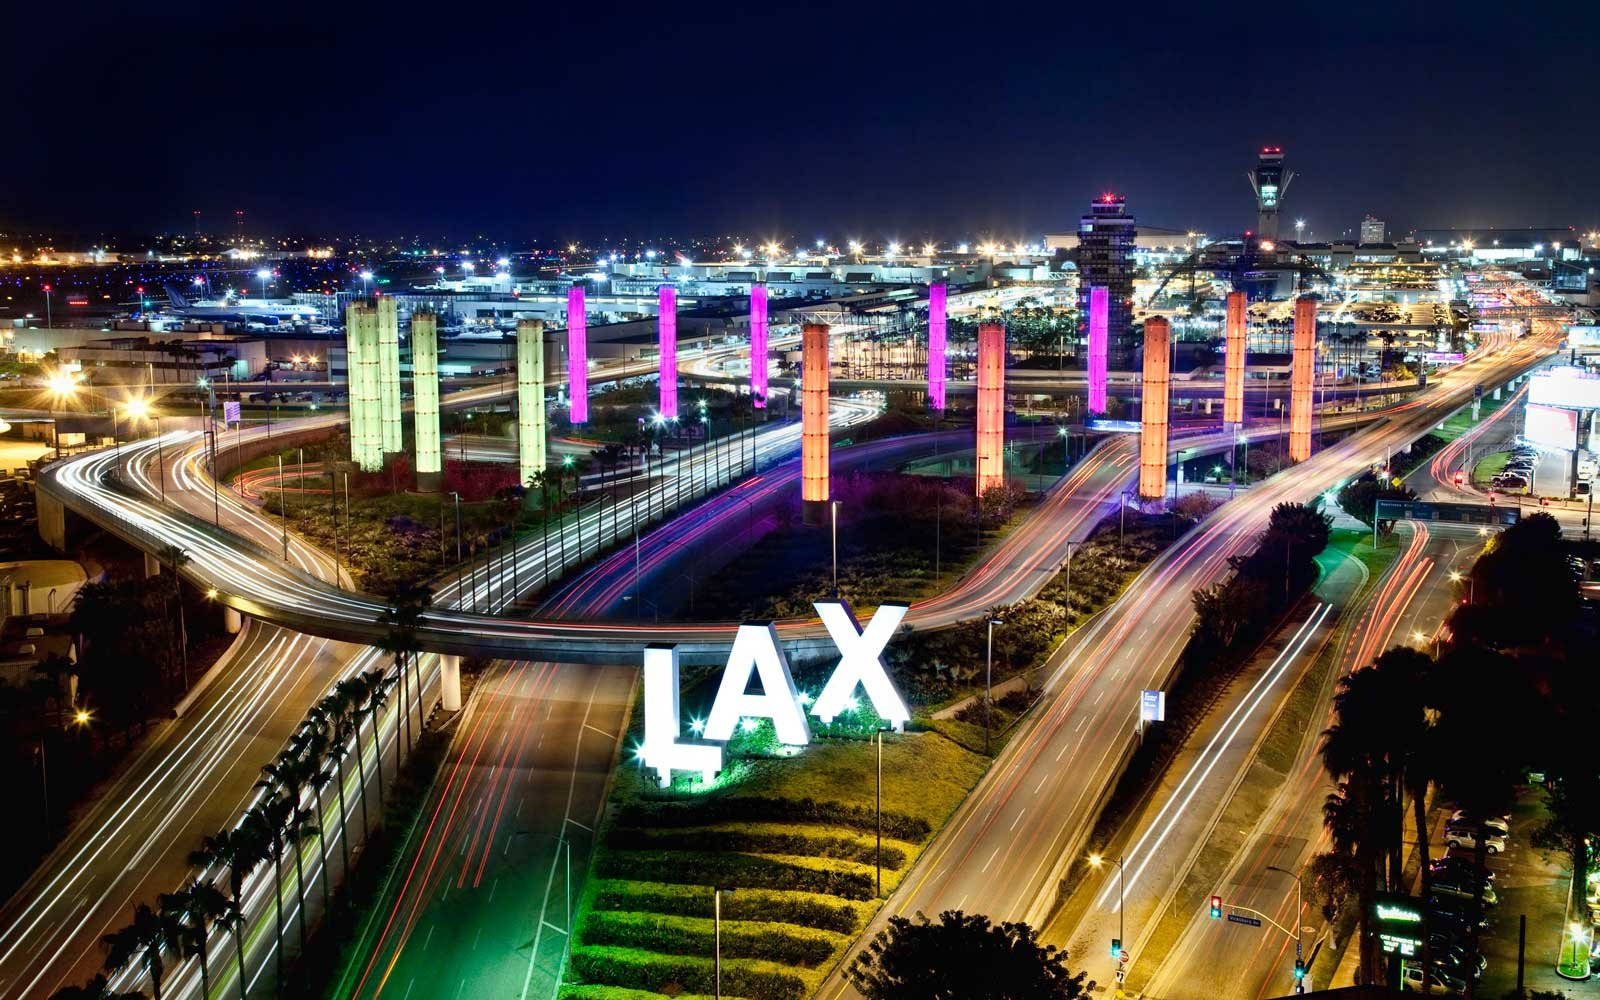

In [1]:
import pandas as pd

In [2]:
#weather = pd.read_csv(r"C:\Users\gbullock\Downloads\weather_lax.csv")
weather = pd.read_csv(r"C:\Users\gbullock\Downloads\weather_lax.csv",index_col="DATE")
#weather

In [3]:
null_pct =weather .apply(pd.isnull).sum()/weather.shape[0]
#null_pct

In [4]:
valid_columns = weather.columns[null_pct < .05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [5]:
weather = weather[valid_columns].copy()

In [6]:
#change column names to lower case
weather.columns = weather.columns.str.lower()

In [7]:
weather

,station,name,prcp,tmax,tmin
DATE,,,,,
1970-01-01,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,62,41
1970-01-02,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,65,42
1970-01-03,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,65,37
1970-01-04,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,60,40
1970-01-05,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,65,43
...,...,...,...,...,...
2023-01-16,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.49,59,50
2023-01-17,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,58,47
2023-01-18,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,60,45


In [8]:
weather  = weather.ffill()

In [9]:
#count of null values 
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

In [10]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

In [11]:
weather.dtypes

station     object
name        object
prcp       float64
tmax         int64
tmin         int64
dtype: object

In [12]:
#change index from object to datetime
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15',
       '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20'],
      dtype='object', name='DATE', length=19378)

In [13]:
weather.index = pd.to_datetime(weather.index)

In [14]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023     20
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

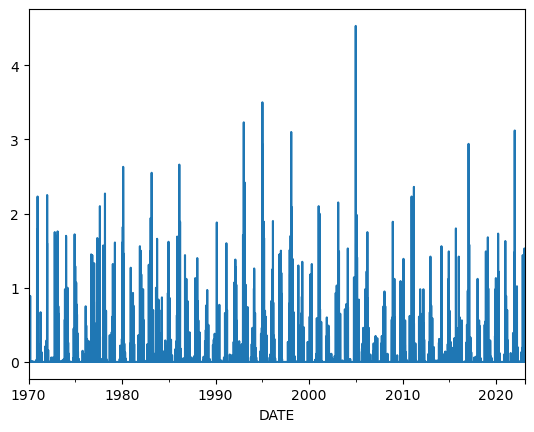

In [15]:
weather["prcp"].plot()

In [16]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1970-01-01,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,62,41,65.0
1970-01-02,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,65,42,65.0
1970-01-03,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,65,37,60.0
1970-01-04,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,60,40,65.0
1970-01-05,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,65,43,69.0
...,...,...,...,...,...,...
2023-01-16,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.49,59,50,58.0
2023-01-17,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,58,47,60.0
2023-01-18,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,60,45,57.0


In [17]:
#forward fill the null value
weather = weather.ffill()

In [18]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [19]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [20]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(weather, rr, predictors)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.094949368461075

In [23]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2002-02-20,89.0,62.943826,26.056174
1989-04-03,99.0,74.511349,24.488651
1988-09-03,106.0,81.537036,24.462964
2004-09-04,101.0,76.765267,24.234733
2008-10-21,96.0,72.406240,23.593760
...,...,...,...
2000-12-11,62.0,61.998471,0.001529
2001-12-21,59.0,58.998749,0.001251
2002-01-19,64.0,64.000918,0.000918


In [24]:
pd.Series(rr.coef_, index=predictors)

prcp   -1.351125
tmax    0.718363
tmin    0.121392
dtype: float64

In [25]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [26]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [27]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [28]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [29]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.034180599586379

In [30]:
mean_squared_error(predictions["actual"], predictions["prediction"])

18.067893211932148

In [31]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2002-02-20,89.0,63.035752,25.964248
1989-04-03,99.0,73.987210,25.012790
2004-09-04,101.0,77.287201,23.712799
1988-09-03,106.0,82.603038,23.396962
2021-11-20,88.0,65.046347,22.953653
...,...,...,...
2016-08-21,75.0,75.000588,0.000588
2001-09-28,75.0,74.999804,0.000196
2010-02-06,60.0,60.000172,0.000172


In [32]:
weather.loc["1990-03-07": "1990-03-17"]

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,67,48,59.0,62.666667,0.069149,47.333333,0.014085,...,50.785714,-0.054852,0.001429,-1.000000,65.317384,66.047619,51.170654,51.476190,0.073844,0.088571
1990-03-08,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,59,49,62.0,62.333333,-0.053476,47.666667,0.027972,...,50.928571,-0.037868,0.001429,-1.000000,65.307325,63.142857,51.167197,51.380952,0.073726,0.115238
1990-03-09,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,62,52,60.0,62.666667,-0.010638,49.666667,0.046980,...,50.928571,0.021038,0.001429,-1.000000,65.302067,63.476190,51.168521,50.809524,0.073609,0.006667
1990-03-10,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.04,60,48,57.0,60.333333,-0.005525,49.666667,-0.033557,...,50.642857,-0.052186,0.004286,8.333333,65.293651,64.190476,51.163492,51.666667,0.073556,0.078095
1990-03-11,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,57,50,57.0,59.666667,-0.044693,50.000000,0.000000,...,50.500000,-0.009901,0.004286,-1.000000,65.280507,63.714286,51.161648,50.952381,0.073439,0.049048
1990-03-12,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.08,57,45,60.0,58.000000,-0.017241,47.666667,-0.055944,...,50.142857,-0.102564,0.010000,7.000000,65.267405,63.666667,51.151899,50.333333,0.073449,0.010000
1990-03-13,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,60,39,62.0,58.000000,0.034483,44.666667,-0.126866,...,49.285714,-0.208696,0.010000,-1.000000,65.259084,64.619048,51.132701,50.571429,0.073333,0.057143
1990-03-14,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,62,43,76.0,59.666667,0.039106,42.333333,0.015748,...,48.571429,-0.114706,0.010000,-1.000000,65.253943,64.952381,51.119874,50.142857,0.073218,0.028571
1990-03-15,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.00,76,46,78.0,66.000000,0.151515,42.666667,0.078125,...,48.071429,-0.043091,0.010000,-1.000000,65.270866,66.666667,51.111811,49.714286,0.073102,0.049048


<AxesSubplot:>

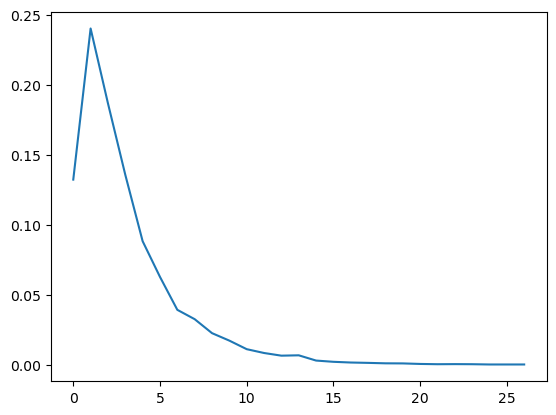

In [33]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [34]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,63.0,64.266223,1.266223
1980-01-14,64.0,63.639105,0.360895
1980-01-15,62.0,65.165426,3.165426
1980-01-16,62.0,63.860985,1.860985
1980-01-17,61.0,64.006645,3.006645
...,...,...,...
2023-01-16,58.0,60.172597,2.172597
2023-01-17,60.0,60.404331,0.404331
2023-01-18,57.0,62.244732,5.244732
